<a href="https://colab.research.google.com/github/Thaizalu/Aprendizado/blob/main/%5BTasm%C3%A2nia%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Tasmânia*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes ao Estado da Tasmânia, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-04-26/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://www.dropbox.com/s/33gfbmmc09b2olm/listings.csv?dl=1) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.


In [7]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [8]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Thaizalu/data_science/main/listings%20(1).csv')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews no último ano
* `license` - 	código emitido pela prefeitura autorizando o aluguel do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [9]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49802124,City Side Apartment Burnie,401649838,Heather,NaN,Burnie,-41.054040,145.903090,Entire home/apt,NaN,2,119,2024-02-15,3.67,2,1,36,DA2021/69
1,37058733,Studio Superior,278730927,Lauren,NaN,Hobart,-42.881980,147.329930,Hotel room,299.0,1,22,2024-01-02,0.42,1,357,6,"Exempt: This listing is a hotel, motel, or car..."
2,22802269,‘Farmlet by the Sea’-FarmStay in Penguin Tasmania,168501712,Michelle,NaN,Central Coast,-41.117810,146.091410,Entire home/apt,226.0,2,119,2024-03-01,1.62,1,242,29,Exempt: This listing falls under Section 12 of...
3,766856347559783004,Family Room,488914521,Aylin,NaN,Devonport,-41.172678,146.363222,Private room,153.0,1,38,2024-01-31,2.42,5,214,25,"Exempt: This listing is a hotel, motel, or car..."
4,43080117,Accessible Home with a View,89794139,Victoria,NaN,Launceston,-41.449280,147.154290,Private room,NaN,1,0,NaN,NaN,1,0,0,Exempt: This listing falls under the 'home sha...


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb.

In [10]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\ {}'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 6209
Variáveis:\ 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 4,65% das linhas.
* A variável `price` tem quase 11% de valores nulos
* A variável `license` tem mais de 5% dos valores nulos.

In [15]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
price                             0.109035
license                           0.052182
last_review                       0.046545
reviews_per_month                 0.046545
host_name                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
name                              0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
id                                0.000000
dtype: float64

#### **Eliminando os valores nulos da coluna `price`**

De forma a facilitar os cálculos e considerando que os valores nulos de price representam 11 do total, os mesmo serão desconsiderados nessa presente análise.

In [16]:
# eliminar todas as entradas onde existam valores ausentes em user_gender
df_clean = df.dropna(subset=['price'], axis=0)

# comprar o antes e o depois
print('Antes:\t{}'.format(df.shape))
print('Depois:\t{}'.format(df_clean.shape))

Antes:	(6209, 18)
Depois:	(5532, 18)


In [17]:
# tornando o df_clean o df

df = df_clean

### **Q3. Qual o tipo de distribuição das variáveis?**


Para identificar a distribuição das variáveis, irei plotar o histograma.

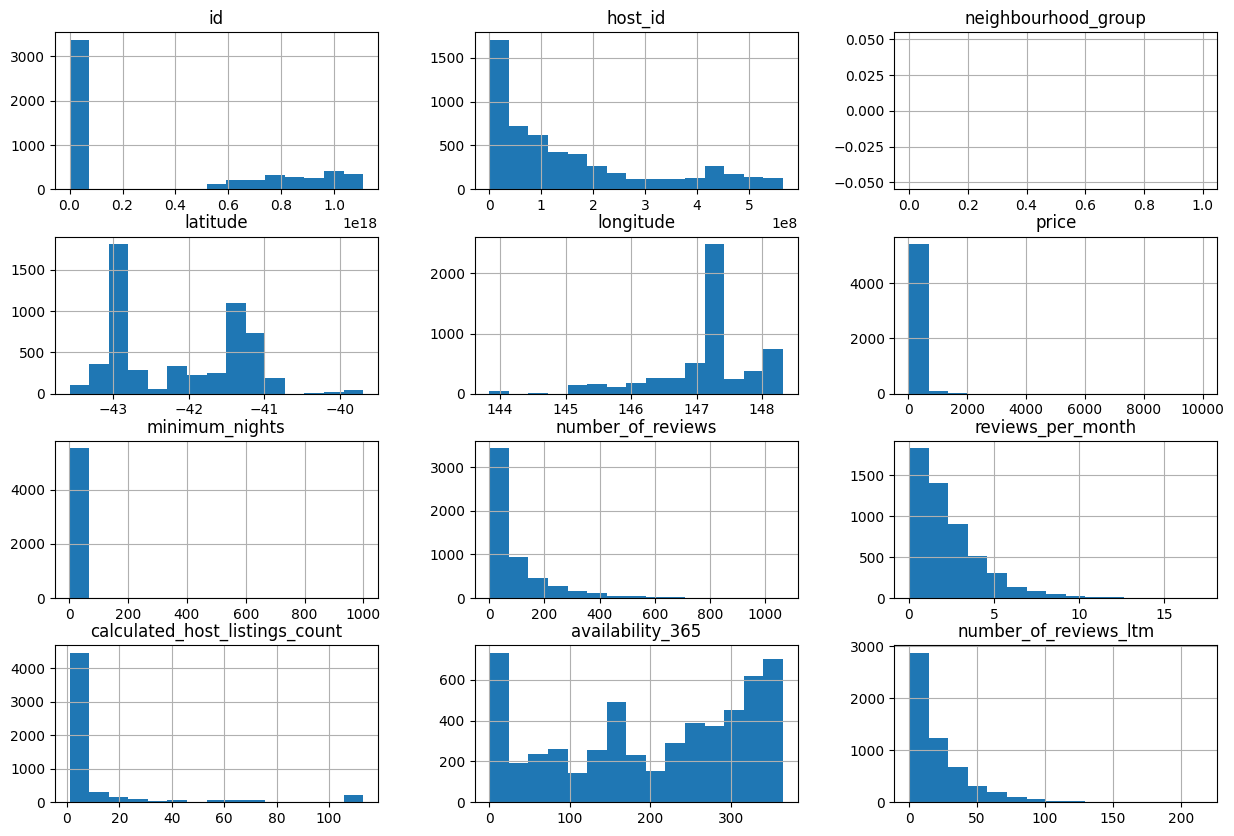

In [18]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

#### **Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [20]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5532.000000,5532.000000,5532.000000,5291.000000,5532.000000,5532.000000,5532.000000
mean,251.672270,2.148952,90.246565,2.305489,10.817607,200.213847,20.598698
std,218.608268,14.195100,122.171970,1.993161,24.390057,120.732026,22.957922
min,30.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,156.000000,1.000000,12.000000,0.860000,1.000000,90.000000,4.000000
50%,212.000000,2.000000,43.000000,1.770000,2.000000,223.000000,13.000000
75%,291.000000,2.000000,120.000000,3.190000,6.000000,314.000000,29.000000
max,10000.000000,999.000000,1064.000000,17.290000,113.000000,365.000000,216.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 291, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

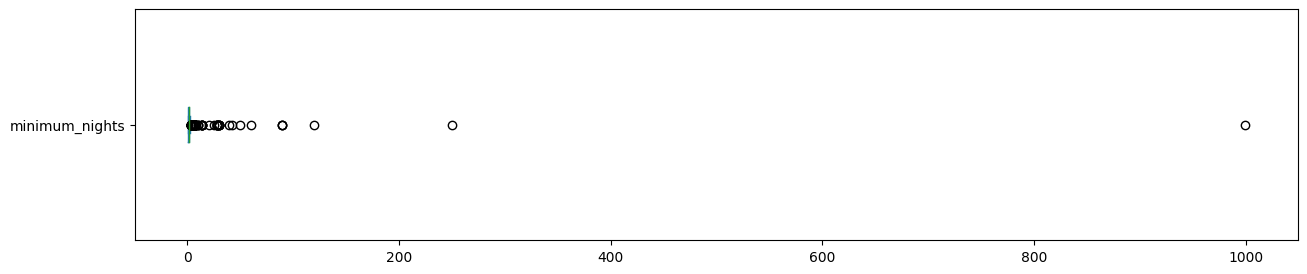

minimum_nights: valores acima de 30:
10 entradas
0.1808%


In [21]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

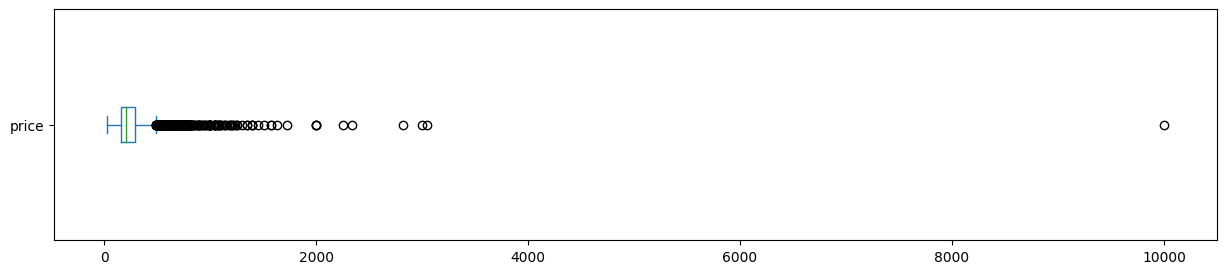


price: valores acima de 1500
14 entradas
0.2531%


In [22]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

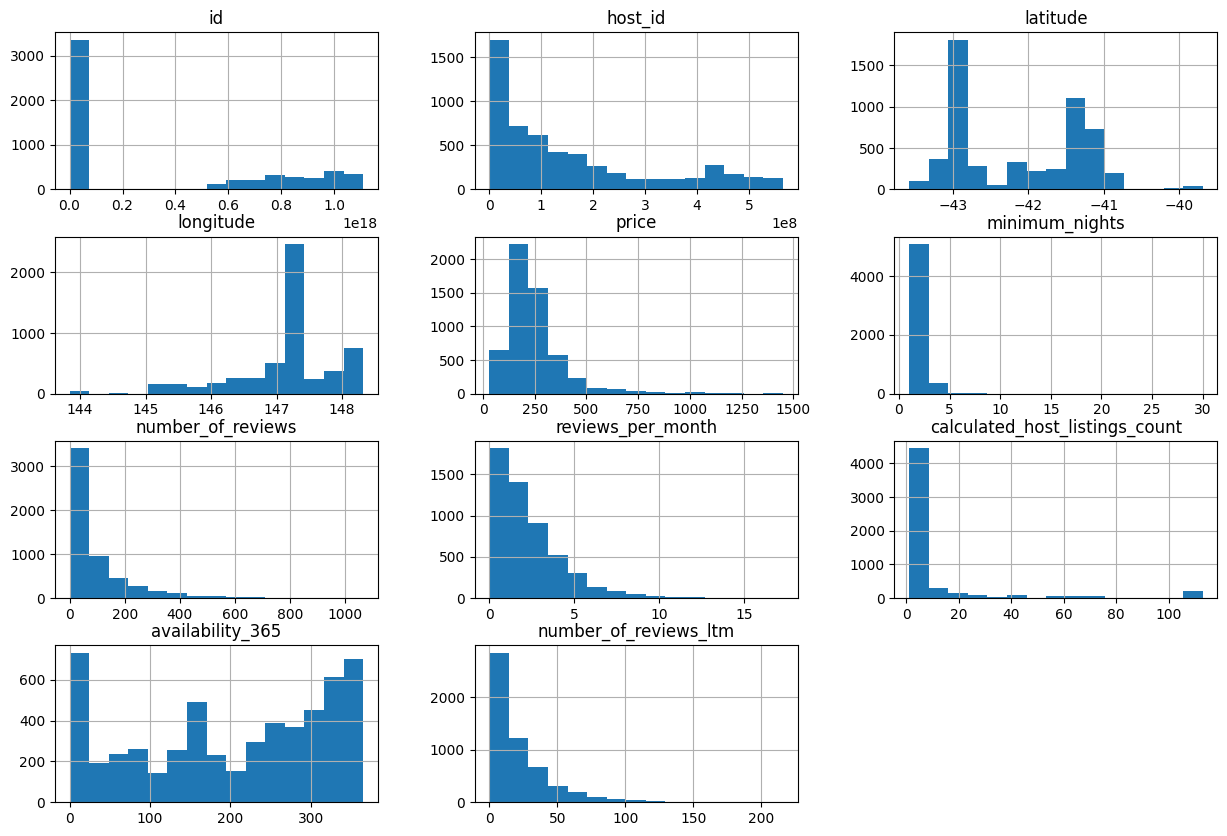

In [23]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [25]:
# ver a média da coluna `price``
# ver a média da coluna `price``
print('Média do aluguel com outlier: {} doláres australianos'.format(df.price.mean().round(2)))
print('Média do aluguel sem outlier: {} doláres australianos'.format(df_clean.price.mean().round(2)))

Média do aluguel com outlier: 251.67 doláres australianos
Média do aluguel sem outlier: 245.55 doláres australianos


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [26]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.048579,-0.161226,-0.172952,0.133543,0.128698,-0.159406
minimum_nights,0.048579,1.000000,-0.061110,-0.117307,0.056535,-0.053944,-0.106431
number_of_reviews,-0.161226,-0.061110,1.000000,0.594546,-0.110304,-0.140657,0.709328
reviews_per_month,-0.172952,-0.117307,0.594546,1.000000,-0.087243,-0.186345,0.821958
calculated_host_listings_count,0.133543,0.056535,-0.110304,-0.087243,1.000000,0.000197,-0.104753
availability_365,0.128698,-0.053944,-0.140657,-0.186345,0.000197,1.000000,-0.185250
number_of_reviews_ltm,-0.159406,-0.106431,0.709328,0.821958,-0.104753,-0.185250,1.000000


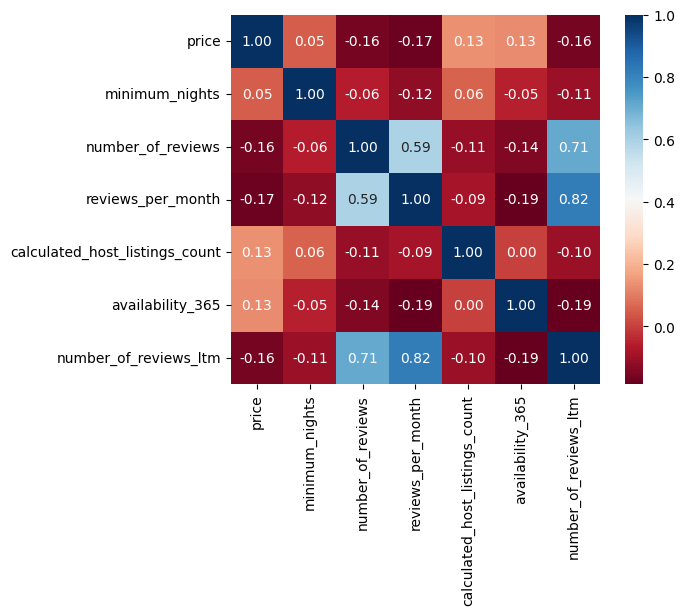

In [27]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [28]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

room_type
Entire home/apt    4829
Private room        582
Hotel room           90
Shared room           8
Name: count, dtype: int64

In [29]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

room_type
Entire home/apt    87.656562
Private room       10.564531
Hotel room          1.633690
Shared room         0.145217
Name: count, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [30]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
King Island             516.736842
Glamorgan/Spring Bay    297.228106
Flinders                294.225806
Break O'Day             274.156522
Northern Midlands       272.960526
Southern Midlands       261.090909
Hobart                  257.150854
Kingborough             250.273196
Huon Valley             250.164384
Central Highlands       250.068493
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

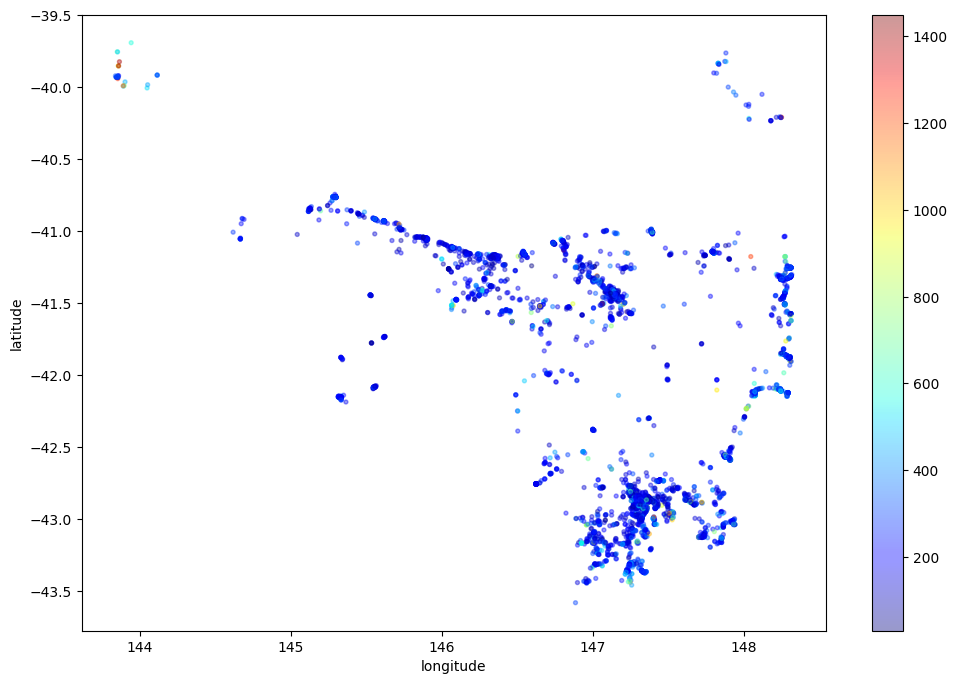

In [31]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [33]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean().round(2)

1.82

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

A escolha do estado da Tasmânia se deu por já ter sido alvo de pesquisa anteriormente da autora, de forma a aprimorar o seu conhecimento em data science.

No dataset escolhido, foi optado por remover a entradas ausentes da coluna `price`, pois não tem conhecimento aprofundado dos locais onde estão ausentes esses dados.

Os maiores preços de aluguel em King Island estão de acordo, pois se trata de uma área muito procurada para prática de golfe, além de ter uma área ambiental bem preservada.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com mais atributos disponíveis.